In [1]:
import pandas
import numpy as np

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras import regularizers

In [6]:
X,y=make_moons(100,noise=.25,random_state=2)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

<Axes: >

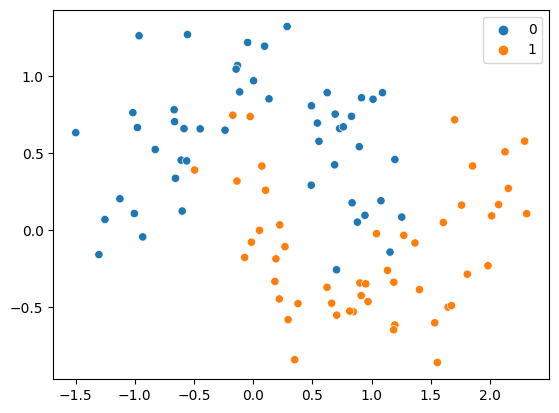

In [7]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# model before regularizaton

In [12]:
model1=Sequential()
model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [17]:
history1=model1.fit(X,y,validation_split=.2,epochs=500)

Epoch 1/500


3/3 [==============================] - 0s 63ms/step - loss: 0.1669 - accuracy: 0.9250 - val_loss: 0.1394 - val_accuracy: 0.9500
Epoch 2/500
3/3 [==============================] - 0s 30ms/step - loss: 0.1649 - accuracy: 0.9250 - val_loss: 0.1384 - val_accuracy: 0.9500
Epoch 3/500
3/3 [==============================] - 0s 30ms/step - loss: 0.1650 - accuracy: 0.9250 - val_loss: 0.1415 - val_accuracy: 0.9500
Epoch 4/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1598 - accuracy: 0.9250 - val_loss: 0.1479 - val_accuracy: 0.9500
Epoch 5/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1591 - accuracy: 0.9375 - val_loss: 0.1588 - val_accuracy: 0.9500
Epoch 6/500
3/3 [==============================] - 0s 30ms/step - loss: 0.1571 - accuracy: 0.9375 - val_loss: 0.1578 - val_accuracy: 0.9500
Epoch 7/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1572 - accuracy: 0.9375 - val_loss: 0.1626 - val_accuracy: 0.9500
Epoch 8/500
3/3 [===============

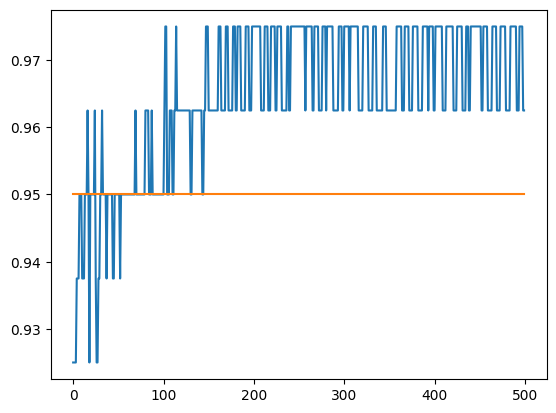

In [18]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.show()

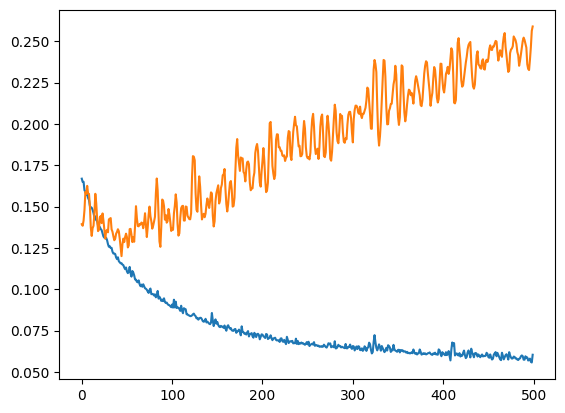

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show()

9600/9600 [==============================] - 17s 2ms/step


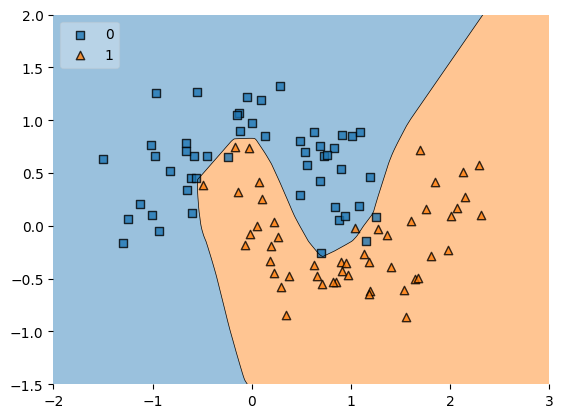

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

# model with regularization

In [24]:
model2=Sequential()
model2.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=regularizers.l1(.001)))  # kernel_regularizer param is used to provide regularization
model2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l1(.001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [26]:
history2=model2.fit(X,y,validation_split=.2,epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 142ms/step - loss: 1.9785 - accuracy: 0.3375 - val_loss: 1.9046 - val_accuracy: 0.7500
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: 1.9006 - accuracy: 0.6750 - val_loss: 1.8376 - val_accuracy: 0.8500
Epoch 3/500
3/3 [==============================] - 0s 25ms/step - loss: 1.8379 - accuracy: 0.7000 - val_loss: 1.7749 - val_accuracy: 0.8500
Epoch 4/500
3/3 [==============================] - 0s 28ms/step - loss: 1.7742 - accuracy: 0.7250 - val_loss: 1.7146 - val_accuracy: 0.8500
Epoch 5/500
3/3 [==============================] - 0s 29ms/step - loss: 1.7182 - accuracy: 0.7375 - val_loss: 1.6560 - val_accuracy: 0.8500
Epoch 6/500
3/3 [==============================] - 0s 27ms/step - loss: 1.6613 - accuracy: 0.7625 - val_loss: 1.5972 - val_accuracy: 0.9000
Epoch 7/500
3/3 [==============================] - 0s 28ms/step - loss: 1.6094 - accuracy: 0.8125 - val_loss: 1.5404 - val_accuracy: 0.9000
Epoch 8/500
3/3 [==

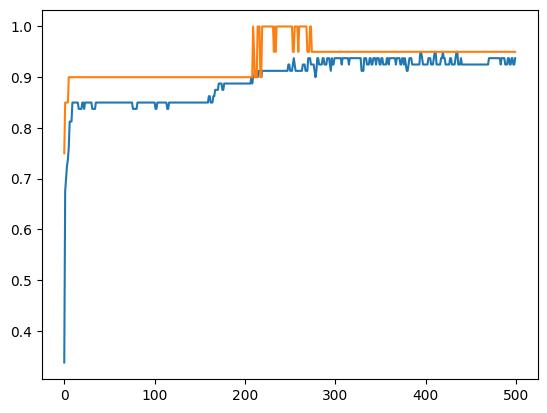

In [27]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

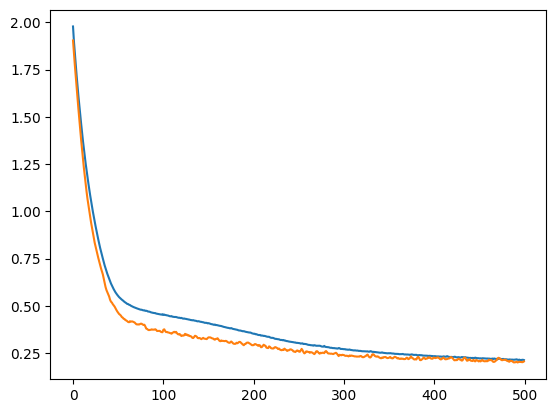

In [28]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

9600/9600 [==============================] - 17s 2ms/step


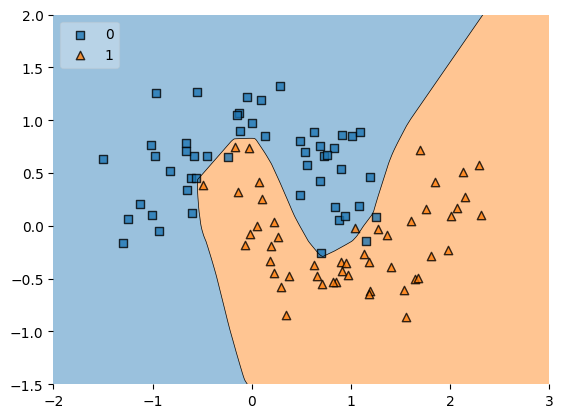

In [30]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()